In [58]:
import pandas as pd
import CaboCha
import corpus
import math
import matplotlib.pyplot as plt
import numpy as np

In [59]:
wrime_df = pd.read_table('wrime/wrime-ver1.tsv', encoding='utf-8', dtype=str)

In [60]:
c = CaboCha.Parser()

In [61]:
class DicElem:
    def __init__(self, lemma):
        self.lemma = lemma
        self.score = {
            "Joy":0,
            "Sadness":0,
            "Anticipation":0,
            "Surprise":0,
            "Anger":0,
            "Fear":0,
            "Disgust":0,
            "Trust":0
        }
    def add_score(self, **kwargs):
        for key, item in kwargs.items():
            if(type(item) is int):
                self.score[key] += item
dic = dict()
            
    

In [53]:
for i, row in wrime_df[:5].iterrows():
    tree = c.parse(row['Sentence'])
    for s_index in range(tree.size()):
        token = tree.token(s_index)
        features = token.feature.split(',')
        lemma = features[6]
        wordcategory = features[0]
        subwordcategory = features[1]
        print(lemma, wordcategory)

ぼけ 名詞
っと 助詞
する 動詞
てる 動詞
た 助動詞
こんな 連体詞
時間 名詞
* 名詞
* 名詞
ある 動詞
から 助詞
食べる 動詞
に 助詞
でる 動詞
たい 助動詞
のに 助詞
… 記号
今日 名詞
の 助詞
月 名詞
も 助詞
白い 形容詞
て 助詞
明るい 形容詞
。 記号
昨日 名詞
より 助詞
雲 名詞
が 助詞
少ない 形容詞
て 助詞
キレイ 名詞
だ 助動詞
* 名詞
と 助詞
立ち止まる 動詞
帰り道 名詞
* 名詞
* 名詞
ない 形容詞
生活 名詞
も 助詞
悪い 形容詞
ない 助動詞
* 名詞
早寝 名詞
する 動詞
つもり 名詞
が 助詞
飲み物 名詞
が 助詞
なくなる 動詞
コンビニ 名詞
へ 助詞
* 名詞
ん 助詞
* 名詞
今日 名詞
、 記号
風 名詞
が 助詞
涼しい 形容詞
な 助詞
。 記号
眠い 形容詞
、 記号
眠れる 動詞
ない 助動詞
。 記号
ただ 接続詞
いま 名詞
* 名詞
って 助詞
新 接頭詞
体操 名詞
する 動詞
てる 動詞
やん 助動詞
* 名詞
外食 名詞
する 動詞
気 名詞
満々 名詞
で 助詞
家 名詞
に 助詞
何 名詞
も 助詞
ない 形容詞
のに 助詞
* 名詞
テレビ 名詞
から 助詞
離れる 動詞
られる 動詞
ない 助動詞
… 記号
* 名詞


In [30]:
def argtoxy(arg, r=1.):
    ret = [
        r * math.cos(arg * math.pi / 180),
        r * math.sin(arg * math.pi / 180)
    ]   
    return ret 

def xytoarg(x, y):
    ret = [
        math.sqrt(x*x + y*y),
        180 * math.atan2(y, x)/ math.pi
    ]
    return ret # 度数法で返すs

In [31]:
e = {
    "Joy":0,
    "Sadness":240,
    "Anticipation":60,
    "Surprise":90,
    "Anger":140,
    "Fear":110,
    "Disgust":180,
    "Trust":-70
}

Sadness 2
Anticipation 1
Disgust 1
月末ミーティング終了｡いつものことだが自分のミーティング力のなさに凹む。もう走り出すしかない。バッティングセンターいこうぜ! -0.5948463103929541 0.04549627928327524


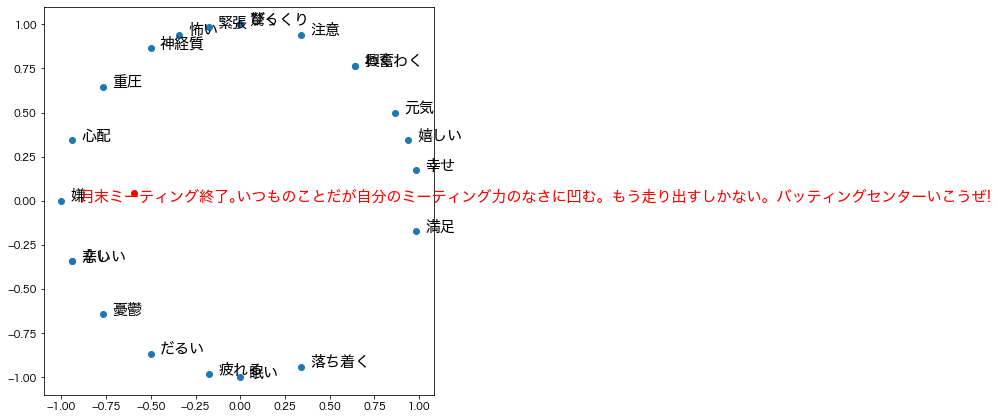

In [89]:
plt.rcParams['font.family'] = 'Hiragino Sans'
fig3 = plt.figure(figsize=(7,7), dpi=72)
ax3 = fig3.add_subplot(111)
x3 = []
y3 = []
id = 10
target = wrime_df.at[id, 'Sentence']
point_sum = 0
tx = 0
ty = 0
for i in e.keys():
    p = int(wrime_df.at[id, f'Avg. Readers_{i}'])
    point_sum += p
    ex, ey = argtoxy(e[i])
    tx += ex * p
    ty += ey * p
    if(p > 0):
        print(i, p)
spx3 = [tx/point_sum]
spy3 = [ty/point_sum]
print(target, spx3[0], spy3[0])
with open('seeds/emot.txt') as f:
    fl = f.readlines()
    for i in fl:
        lemma, arg = i.split()
        xp, yp = corpus.argtoxy(int(arg))
        x3.append(xp)
        y3.append(yp)
        ax3.text(xp+0.05, yp, lemma, fontsize=15)
ax3.scatter(x3, y3)
ax3.text(-0.9, 0, target, fontsize=15, c='red')
ax3.scatter(spx3, spy3, c='red')

In [32]:
dic: dict[corpus.WordDicElement] = dict()
parser = CaboCha.Parser()

In [33]:
for i, row in wrime_df[:].iterrows():
    text = row['Sentence']
    point_sum = 0
    tx = 0
    ty = 0
    for i in e.keys():
        p = int(row[f'Avg. Readers_{i}'])
        point_sum += p
        ex, ey = argtoxy(e[i])
        tx += ex * p
        ty += ey * p
    if
    '''
    if(point_sum == 0):
        tx = 0
        ty = 0
    else:
        tx = tx/point_sum
        ty = ty/point_sum
    '''

    tree = parser.parse(text)
    for tindex in range(tree.size()):
        token = tree.token(tindex)
        features = token.feature.split(',')
        lemma = features[6]
        wordcategory = features[0]
        subwordcategory = features[1]
        if(not lemma in dic.keys()):
            dic[lemma] = corpus.WordDicElement(lemma)
        dic[lemma].add_score([tx, ty])

In [41]:
s = dic['嬉しい'].score
xs = [i[0] for i in s]
ys = [i[1] for i in s]
rs = [(x**2 + y**2)**0.5 for x,y in zip(xs, ys)]
xave = sum(xs)/len(xs)
yave = sum(ys)/len(ys)
rave = (xave**2 + yave**2)**0.5
xvar = sum([(i - xave)**2 for i in xs])/len(xs)
yvar = sum([(i - yave)**2 for i in ys])/len(xs)
cov = sum([(i[0] - xave)*(i[1] - yave) for i in s])/len(xs)
#print(xs)
#print(ys)
#print(rs)
print(xave, xvar)
print(yave, yvar)
print(rave)
print(cov)

0.6648431756182358 0.14882682029670538
0.17385840493248925 0.0971482995202828
0.6871995293448692
-0.016202606116755298


In [34]:
for key in dic.keys():
    score_len = len(dic[key].score)
    sumx = sum(i[0] for i in dic[key].score)
    sumy = sum(i[1] for i in dic[key].score)
    dic[key].set_value(sumx/score_len, sumy/score_len)
    

In [35]:
data = {'lemma':[], 'x':[], 'y':[], 'r':[], 'frequency':[]}
for key in dic.keys():
    data['lemma'].append(dic[key].lemma)
    data['x'].append(dic[key].value_x)
    data['y'].append(dic[key].value_y)
    data['r'].append((dic[key].value_x**2 + dic[key].value_y**2)**0.5)
    data['frequency'].append(len(dic[key].score))

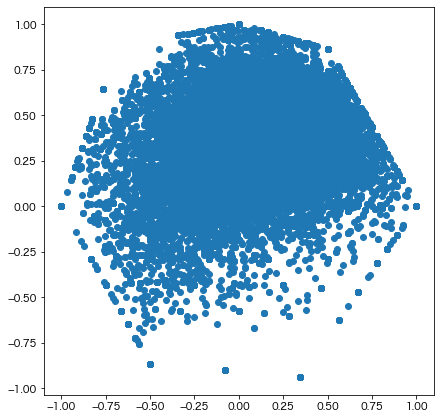

In [37]:
plt.rcParams['font.family'] = 'Hiragino Sans'
fig3 = plt.figure(figsize=(7,7), dpi=72)
ax3 = fig3.add_subplot(111)
x = data['x']
y = data['y']
ax3.scatter(x, y)

(-1.0, 1.0)

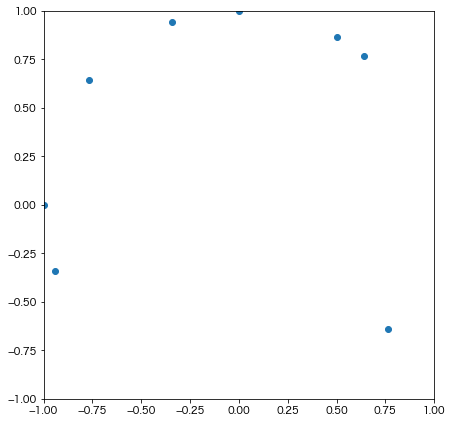

In [25]:
plt.rcParams['font.family'] = 'Hiragino Sans'
fig3 = plt.figure(figsize=(7,7), dpi=72)
ax3 = fig3.add_subplot(111)
x = []
y = []
for i in e:
    tmpx, tmpy = argtoxy(e[i])
    x.append(tmpx), y.append(tmpy)
ax3.scatter(x, y)
ax3.set_xlim([-1,1])
ax3.set_ylim([-1,1])

In [18]:
data.append([])
for x, y in zip(data[1], data[2]):
    data[3].append((x**2 + y**2)**0.5)

In [ ]:
data.append([])
for x, y in zip(data[1], data[2]):
    data[3].append((x**2 + y**2)**0.5)

In [29]:
outdf = pd.DataFrame(data)
outdf.loc[outdf['r'] >= 0.7].sort_values('frequency', ascending=False).to_csv('wrimedic/means.csv', encoding="utf-8", index=False)

In [22]:
outdf

,lemma,x,y,r
0,不確か,0.109663,0.445291,0.458595
1,だ,-0.108607,0.522501,0.533670
2,夜,-0.003345,0.554089,0.554099
3,風,0.064991,0.632245,0.635577
4,が,-0.086023,0.529461,0.536404
...,...,...,...,...
25450,拓ける,0.595192,0.799371,0.996618
25451,ダイニング,0.321394,0.883022,0.939693
25452,秋分,0.571394,0.816035,0.996195
25453,係員,0.642788,0.766044,1.000000


In [29]:
wrime_df.at[0, 'Avg. Readers_Fear']

'0'

In [38]:
e

{'Joy': 50,
 'Sadness': -160,
 'Anticipation': 60,
 'Surprise': 90,
 'Anger': 140,
 'Fear': 110,
 'Disgust': 180,
 'Trust': -40}

In [47]:
wrime_df[23:24]

,Sentence,UserID,Datetime,Train/Dev/Test,Writer_Joy,Writer_Sadness,Writer_Anticipation,Writer_Surprise,Writer_Anger,Writer_Fear,...,Reader3_Disgust,Reader3_Trust,Avg. Readers_Joy,Avg. Readers_Sadness,Avg. Readers_Anticipation,Avg. Readers_Surprise,Avg. Readers_Anger,Avg. Readers_Fear,Avg. Readers_Disgust,Avg. Readers_Trust
23,不確かな夜風が待ち人連れ去りぬ。???ふと､待ち人は来ないのではないかという疑念に駆られる。...,1,2012/09/13 23:33,train,2,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [83]:
word_df.loc[word_df['lemma'] == 'a']

,lemma,x,y,r,theta,frequency


In [72]:
for i in dic.keys():
    x = 0
    y = 0
    for s in dic[i].score:
        x += s[0]
        y += s[1]
    x = x / len(dic[i].score)
    y = y / len(dic[i].score)
    dic[i].set_value(x, y)
    print(i, dic[i].value_x, dic[i].value_y, xytoarg(dic[i].value_x, dic[i].value_y), len(dic[i].score))
    frequency.append(len(dic[i].score))

不確か 0.10966330944572193 0.44529057139246425 [0.45859539292236184, 76.16488012700954] 2
だ -0.10860727654528742 0.522501475224749 [0.5336696844777896, 101.74230719852798] 22791
夜 -0.0033454398406210046 0.5540886318423353 [0.5540987311884391, 90.34593247964446] 394
風 0.0649910299198228 0.6322450329031073 [0.6355766008914193, 84.1309486371652] 144
が -0.08602314831618364 0.5294611168499732 [0.5364038183143826, 99.2283803449111] 21747
待ち人 0.0 0.0 [0.0, 0.0] 2
連れ去る 0.3213938048432697 0.383022221559489 [0.5, 50.0] 2
ぬ -0.17717386022652998 0.4785621617257939 [0.5103061036115822, 110.31562086959273] 1066
。 -0.0510054262772667 0.5344825849378774 [0.5369107813329892, 95.45120211378213] 30267
* 0.0007421248164491501 0.5670561029259897 [0.5670565885472577, 89.92501518745868] 79776
ふと -0.02443008992205315 0.5799317935514073 [0.5804461339912186, 92.4122042560606] 51
は -0.030383081923465404 0.5382252677259534 [0.5390821555995359, 93.23094596131294] 17703
来る -0.07726662976545631 0.547133350222544 [0.552

1

In [80]:
fs = pd.Series(frequency)
fs.value_counts(bins=np.linspace(0, 5000, 11))

(-0.001, 500.0]     25287
(500.0, 1000.0]        71
(1000.0, 1500.0]       32
(1500.0, 2000.0]       12
(2000.0, 2500.0]       11
(3500.0, 4000.0]        5
(2500.0, 3000.0]        3
(3000.0, 3500.0]        3
(4000.0, 4500.0]        3
(4500.0, 5000.0]        2
dtype: int64